# Diving in Image recognition with `CIFAR-10` Dataset

### Download CIFAR-10

In [1]:
import torch
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

In [2]:
# If not downloaded it will download to the path provided
data_path = 'Dataset/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
len(cifar10)

50000

In [4]:
# getting a specific image
img, label = cifar10[550]

img, label

(<PIL.Image.Image image mode=RGB size=32x32>, 3)

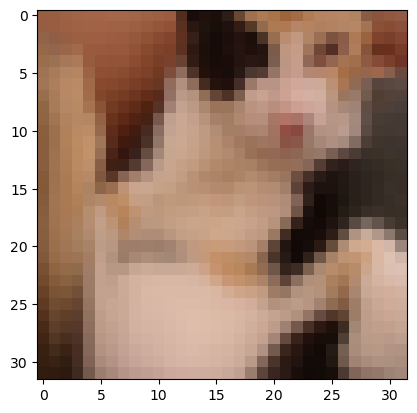

In [5]:
# Display image
plt.imshow(img)
plt.show()

In [6]:
# type of cifar
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [7]:
# tranformrs directory
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

#### Convert into tensors

In [8]:
to_tensor = transforms.ToTensor()

img_t = to_tensor(img)

img_t.shape

torch.Size([3, 32, 32])

In [9]:
# pass the transform directly as an argument to dataset
tensor_cifar10 = datasets.CIFAR10(data_path,
                                  train=True,
                                  download=False,
                                  transform=transforms.ToTensor())

In [10]:
img_t, _ = tensor_cifar10[99]

In [11]:
type(img_t)

torch.Tensor

In [12]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

The values in the original PIL image ranged from 0 to 255 (8 bits per channel), <br>
the ToTensor transform turns the data into a 32-bit floating-point per channel, <br>
scaling the values down from 0.0 to 1.0.

In [13]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

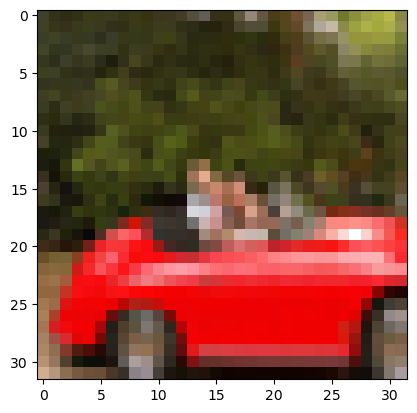

In [14]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

### Normalization

In [15]:
# stack all the tensors
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)

imgs.shape

torch.Size([3, 32, 32, 50000])

In [16]:
# flattern the tensor
imgs_flattern = imgs.view(3, -1)
imgs_flattern.shape

torch.Size([3, 51200000])

In [17]:
# compute the mean per channel
# Mean for 3 channels (R, G, B)
img_mean = imgs_flattern.mean(dim=1)
img_mean

tensor([0.4914, 0.4822, 0.4465])

In [18]:
# Compute standard deviation
img_std = imgs_flattern.std(dim=1)
img_std

tensor([0.2470, 0.2435, 0.2616])

initialize the Normalize transform

In [19]:
transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [20]:
# train
transformed_cifar10 = datasets.CIFAR10(data_path,
                                       train=True,
                                       download=False,
                                       transform=transforms.Compose([ 
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                               (0.2470, 0.2435, 0.2616))
                                       ]))

# test
transformed_cifar10_val = datasets.CIFAR10(data_path,
                                           train=False,
                                           download=False,
                                           transform=transforms.Compose([ 
                                               transforms.ToTensor(),
                                               transforms.Normalize(mean=(0.4914, 0.4822, 0.4465),
                                                                   std=(0.2470, 0.2435, 0.2616))
                                           ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9802876..2.1264887].


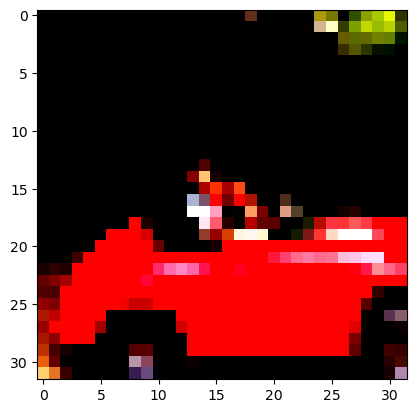

In [21]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

# Telling Birds from Airplane

Converting the dataset into binary dataset

In [22]:
label_map = {0:0, 2:1}
class_name = ['airplane', 'bird']

In [23]:
cifar2 = [(img, label_map[label])
          for img, label in transformed_cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in transformed_cifar10_val
              if label in [0, 2]]

In [24]:
len(cifar2)

10000

In [25]:
img, label = cifar2[99]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6581874..2.0137537].


<function matplotlib.pyplot.show(close=None, block=None)>

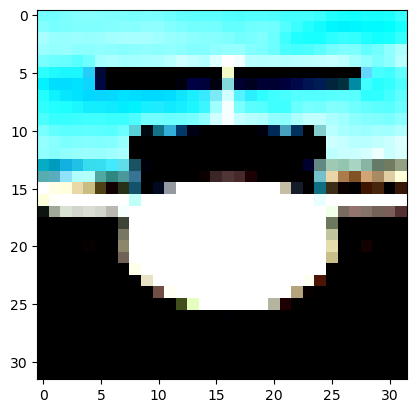

In [26]:
plt.imshow(img.permute(1,2,0))
plt.show

## Create a model with 1 hidden layer

In [27]:
import torch.nn as nn

In [28]:
# number of inputs
n_in = 3 * 32 * 32
# number of outputs
n_out = 2

In [29]:
model = nn.Sequential(
    nn.Linear(n_in, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.LogSoftmax(dim=1),
)

1 example image testing

In [30]:
img, _ = cifar2[0]

In [31]:
type(img)

torch.Tensor

In [32]:
# convert image into 1D array
img_batch = img.view(-1).unsqueeze(0)

In [33]:
img_batch.shape

torch.Size([1, 3072])

In [34]:
# train model on 1 image
out = model(img_batch)

out

tensor([[-0.7772, -0.6156]], grad_fn=<LogSoftmaxBackward0>)

Index `0`: Airplane, `1`: Bird 

In [35]:
_, index = torch.max(out, dim=1)

index

tensor([1])

## Using negative log likelihood (NLL) loss function

In [36]:
loss = nn.NLLLoss()

In [37]:
img, label = cifar2[0]

label

1

In [38]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[-0.7772, -0.6156]], grad_fn=<LogSoftmaxBackward0>)

In [39]:
loss(out, torch.tensor([label]))

tensor(0.6156, grad_fn=<NllLossBackward0>)

## Define parameters

In [40]:
learning_rate = 1e-2
epochs = 100

## define optimizer

In [41]:
import torch.optim as optim

In [42]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

## Define loss function

In [43]:
loss_fn = nn.NLLLoss()

### Configure device

In [44]:
device = 'cuda'

model.to(device)

Sequential(
  (0): Linear(in_features=3072, out_features=512, bias=True)
  (1): Tanh()
  (2): Linear(in_features=512, out_features=2, bias=True)
  (3): LogSoftmax(dim=1)
)

## Dataloader

In [45]:
from torch.utils.data import DataLoader

batch_size = 64
train_loader = DataLoader(cifar2, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(cifar2_val, batch_size=batch_size, shuffle=False)

## Training loop

In [158]:
for epoch in range(1, epochs+1):
    for img_batch, label_batch in loader_train:

        # Move data to the device
        img_batch = img_batch.to(device)  # Move image tensor to the GPU
        label_batch = torch.tensor(label_batch)
        label_batch = label_batch.to(device)  # Move label tensor to the GPU

        img_batch = img_batch.view(img_batch.size(0), -1)  # Flatten image

        out = model(img_batch)
        loss = loss_fn(out, label_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch}, Loss: {loss:.4f}")

/tmp/ipykernel_1751/862976343.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_batch = torch.tensor(label_batch)


Epoch: 1, Loss: 0.6391
Epoch: 2, Loss: 0.6605
Epoch: 3, Loss: 0.7033
Epoch: 4, Loss: 0.6729
Epoch: 5, Loss: 0.6922
Epoch: 6, Loss: 0.6468
Epoch: 7, Loss: 0.7163
Epoch: 8, Loss: 0.7253
Epoch: 9, Loss: 0.6949
Epoch: 10, Loss: 0.6675
Epoch: 11, Loss: 0.7296
Epoch: 12, Loss: 0.7073
Epoch: 13, Loss: 0.6256
Epoch: 14, Loss: 0.7048
Epoch: 15, Loss: 0.7251
Epoch: 16, Loss: 0.7676
Epoch: 17, Loss: 0.7523
Epoch: 18, Loss: 0.7338
Epoch: 19, Loss: 0.6997
Epoch: 20, Loss: 0.6371
Epoch: 21, Loss: 0.7293
Epoch: 22, Loss: 0.6876
Epoch: 23, Loss: 0.6115
Epoch: 24, Loss: 0.6430
Epoch: 25, Loss: 0.7015
Epoch: 26, Loss: 0.6812
Epoch: 27, Loss: 0.7526
Epoch: 28, Loss: 0.6760
Epoch: 29, Loss: 0.6272
Epoch: 30, Loss: 0.7028
Epoch: 31, Loss: 0.7045
Epoch: 32, Loss: 0.6803
Epoch: 33, Loss: 0.7368
Epoch: 34, Loss: 0.6587
Epoch: 35, Loss: 0.6863
Epoch: 36, Loss: 0.6125
Epoch: 37, Loss: 0.6915
Epoch: 38, Loss: 0.6640
Epoch: 39, Loss: 0.7420
Epoch: 40, Loss: 0.7010
Epoch: 41, Loss: 0.6809
Epoch: 42, Loss: 0.6981
E

## Accuracy

In [157]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in test_loader:

        imgs = imgs.to(device)
        labels = labels.to(device)
        
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size,-1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
    
print("Accuracy: %f", correct / total)

Accuracy: %f 0.537


## Defining all parameters in 1 roof

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 3.641151
Epoch: 1, Loss: 4.989933
Epoch: 2, Loss: 1.167691
Epoch: 3, Loss: 6.303051
Epoch: 4, Loss: 12.628299
Epoch: 5, Loss: 12.737124
Epoch: 6, Loss: 12.567104
Epoch: 7, Loss: 10.258410
Epoch: 8, Loss: 9.528527
Epoch: 9, Loss: 20.490479
Epoch: 10, Loss: 10.521297
Epoch: 11, Loss: 7.078247
Epoch: 12, Loss: 13.167274
Epoch: 13, Loss: 9.374051
Epoch: 14, Loss: 11.692616
Epoch: 15, Loss: 4.464515
Epoch: 16, Loss: 13.137626
Epoch: 17, Loss: 5.501299
Epoch: 18, Loss: 7.433122
Epoch: 19, Loss: 7.807355
Epoch: 20, Loss: 11.513771
Epoch: 21, Loss: 18.033234
Epoch: 22, Loss: 12.376985
Epoch: 23, Loss: 10.644934
Epoch: 24, Loss: 13.506724
Epoch: 25, Loss: 3.997938
Epoch: 26, Loss: 5.486836
Epoch: 27, Loss: 0.054412
Epoch: 28, Loss: 1.337059
Epoch: 29, Loss: 14.065343
Epoch: 30, Loss: 5.341583
Epoch: 31, Loss: 9.499149
Epoch: 32, Loss: 14.166084
Epoch: 33, Loss: 12.133673
Epoch: 34, Loss: 11.725872
Epoch: 35, Loss: 13.929154
Epoch: 36, Loss: 12.197278
Epoch: 37, Loss: 8.418855
Ep

## DataLoader

In [48]:
from torch.utils.data import DataLoader

In [50]:
train_loader = DataLoader(cifar2, batch_size=64, shuffle=True)

## Training in batches

In [53]:
for epoch in range(1, n_epochs+1):

    for img_batch, label_batch in train_loader:

        out = model(img_batch.view(img_batch.shape[0], -1))
        loss = loss_fn(out, label_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 1, Loss: 0.036104
Epoch: 2, Loss: 0.534175
Epoch: 3, Loss: 0.068890
Epoch: 4, Loss: 0.083835
Epoch: 5, Loss: 0.095724
Epoch: 6, Loss: 0.283701
Epoch: 7, Loss: 0.321046
Epoch: 8, Loss: 0.019270
Epoch: 9, Loss: 0.115748
Epoch: 10, Loss: 0.004692
Epoch: 11, Loss: 0.079234
Epoch: 12, Loss: 0.284482
Epoch: 13, Loss: 0.096420
Epoch: 14, Loss: 0.153455
Epoch: 15, Loss: 0.434144
Epoch: 16, Loss: 0.218087
Epoch: 17, Loss: 0.117191
Epoch: 18, Loss: 0.126637
Epoch: 19, Loss: 0.422561
Epoch: 20, Loss: 0.397096
Epoch: 21, Loss: 0.344716
Epoch: 22, Loss: 0.023209
Epoch: 23, Loss: 0.045343
Epoch: 24, Loss: 0.072131
Epoch: 25, Loss: 0.402069
Epoch: 26, Loss: 0.021150
Epoch: 27, Loss: 0.181789
Epoch: 28, Loss: 0.098271
Epoch: 29, Loss: 0.133460
Epoch: 30, Loss: 0.042983
Epoch: 31, Loss: 0.223348
Epoch: 32, Loss: 0.284233
Epoch: 33, Loss: 0.044392
Epoch: 34, Loss: 0.209911
Epoch: 35, Loss: 0.236981
Epoch: 36, Loss: 0.470504
Epoch: 37, Loss: 0.217210
Epoch: 38, Loss: 0.421908
Epoch: 39, Loss: 0.15

## Accuracy

In [54]:
# train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
#                                            shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.900000


In [55]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.681000


## Including more layers

In [56]:
in_ = 3072
out = 2

model = nn.Sequential(
    nn.Linear(in_, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, out),
    nn.LogSoftmax(dim=1))

## loss function to CrossEntropyLoss

In [57]:
loss_fn = nn.CrossEntropyLoss()

## Train model with more layers

In [59]:
learning_rate = 1e-4

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(1, n_epochs+1):

    for img_batch, label_batch in train_loader:

        out = model(img_batch.view(img_batch.shape[0], -1))
        loss = loss_fn(out, label_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 1, Loss: 0.685718
Epoch: 2, Loss: 0.658620
Epoch: 3, Loss: 0.643667
Epoch: 4, Loss: 0.649498
Epoch: 5, Loss: 0.664906
Epoch: 6, Loss: 0.594040
Epoch: 7, Loss: 0.587843
Epoch: 8, Loss: 0.632709
Epoch: 9, Loss: 0.677843
Epoch: 10, Loss: 0.660524
Epoch: 11, Loss: 0.652785
Epoch: 12, Loss: 0.614676
Epoch: 13, Loss: 0.507440
Epoch: 14, Loss: 0.586520
Epoch: 15, Loss: 0.644191
Epoch: 16, Loss: 0.574123
Epoch: 17, Loss: 0.593709
Epoch: 18, Loss: 0.622950
Epoch: 19, Loss: 0.624224
Epoch: 20, Loss: 0.609070
Epoch: 21, Loss: 0.544129
Epoch: 22, Loss: 0.471077
Epoch: 23, Loss: 0.626031
Epoch: 24, Loss: 0.391097
Epoch: 25, Loss: 0.540826
Epoch: 26, Loss: 0.764738
Epoch: 27, Loss: 0.318285
Epoch: 28, Loss: 0.469201
Epoch: 29, Loss: 0.451271
Epoch: 30, Loss: 0.597405
Epoch: 31, Loss: 0.427028
Epoch: 32, Loss: 0.564643
Epoch: 33, Loss: 0.649006
Epoch: 34, Loss: 0.563881
Epoch: 35, Loss: 0.719474
Epoch: 36, Loss: 0.430741
Epoch: 37, Loss: 0.570369
Epoch: 38, Loss: 0.746409
Epoch: 39, Loss: 0.44

In [60]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.776500


## Total Prameters using numel method

In [61]:
numel_list = [p.numel()
             for p in model.parameters()
             if p.requires_grad == True]

sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])